# Compare configurations

In [1]:
import sys
sys.path.append('../')  # uncomment to add the path to the onlineSG folder 
# You have to change the path if you move this file.
# Alternatevely add the onlineSG folder to your PYTHONPATH
# e.g. On Linux add this line on .bashrc:
# export PYTHONPATH="<absolute-path-to-onlineSG>:PYTHONPATH"
# then you can use onlineSG library from everywhere

In [1]:
import source.game as game
import source.player as player
import source.environment as environment
import source.errors as errors
import source.parsers as parsers
import source.players.attackers as attackers
import source.players.base_defenders as base_defenders
import source.players.defenders as defenders
import source.runner as runner


import numpy as np
import pandas as pd
from importlib import *

In [2]:
def print_move(m):
    l1 = ""
    for i in range(len(g.values)):
        if m[0][0] == i:
            l1 += "□\t"
        else:
            l1 += " \t"
    l2 = "".join([str(i[0])+"\t" for i in g.values])
    l3 = ""
    for i in range(len(g.values)):
        if m[1][0] == i:
            l3 += "△\t"
        else:
            l3 += " \t"
    print(l1)
    print(l2)
    print(l3)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# if you change something in the files, don't forget to reload
reload(player)
reload(base_defenders)
reload(attackers)
reload(defenders)
reload(errors)
reload(runner)
reload(parsers)
reload(game)
reload(environment)

<module 'source.environment' from '/home/lorenzo/Scrivania/Polimi/Thesis/code/onlineSG/source/environment.py'>

In [44]:
time_horizon = 300

In [108]:
values = ((1, 1), (2, 2), (3, 3))
g1 = game.Game(values, time_horizon)
experts = [base_defenders.StackelbergDefender(g1, 0),
           base_defenders.UnknownStochasticDefender(g1, 0, algorithm='fpl')]
agent = base_defenders.MABDefender(g1, 0, 1, 1, experts)
#attacker = attackers.StackelbergAttacker(g1, 1)
attacker = attackers.StochasticAttacker(g1, 1, 1,0.55,0.35,0.1)
g1.set_players([agent], [attacker])

In [109]:
rm -rf ./detect_with_expert_sto

In [110]:
c1 = runner.Configuration(g1, "detect_with_expert_sto")

In [111]:
values = ((1, 1), (2, 2), (3, 3))
g2 = game.Game(values, time_horizon)
agent = defenders.FABULOUS(g2,0,1,0.55,0.35,0.1)
#attacker = attackers.StackelbergAttacker(g2, 1)
attacker = attackers.StochasticAttacker(g2, 1, 1,0.55,0.35,0.1)
g2.set_players([agent], [attacker])

In [112]:
rm -rf ./fabulous_sto

In [113]:
c2 = runner.Configuration(g2, "fabulous_sto")

In [128]:
values = ((1, 1), (2, 2), (3, 3))
g3 = game.Game(values, time_horizon)
experts = [base_defenders.StackelbergDefender(g3, 0),
           base_defenders.UnknownStochasticDefender(g3, 0, algorithm='fpl')]
agent = base_defenders.MABDefender(g3, 0, 1, 1, experts)
attacker = attackers.StackelbergAttacker(g3, 1)
#attacker = attackers.StochasticAttacker(g3, 1, 1,0.55,0.35,0.1)
g3.set_players([agent], [attacker])

In [129]:
rm -rf ./detect_with_expert_sta

In [130]:
c3 = runner.Configuration(g3, "detect_with_expert_sta")

In [125]:
values = ((1, 1), (2, 2), (3, 3))
g4 = game.Game(values, time_horizon)
agent = defenders.FABULOUS(g4,0,1,0.55,0.35,0.1)
attacker = attackers.StackelbergAttacker(g4, 1)
#attacker = attackers.StochasticAttacker(g4, 1, 1,0.55,0.35,0.1)
g4.set_players([agent], [attacker])

In [126]:
rm -rf ./fabulous_sta

In [127]:
c4 = runner.Configuration(g4, "fabulous_sta")

In [131]:
num_exp = 100

In [132]:
for i in range(num_exp):
    c1.run_an_experiment()
    if not i % 10:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [133]:
for i in range(num_exp):
    c2.run_an_experiment()
    if not i % 10:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [134]:
for i in range(num_exp):
    c3.run_an_experiment()
    if not i % 10:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [135]:
for i in range(num_exp):
    c4.run_an_experiment()
    if not i % 10:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [136]:
c1.stats, c2.stats, c3.stats, c4.stats

({'avg_total_rewards': -282.19, 'avg_weak_regret': 28.95},
 {'avg_total_rewards': -257.02, 'avg_weak_regret': 0.17},
 {'avg_total_rewards': -364.08, 'avg_weak_regret': 357.48},
 {'avg_total_rewards': -372.36, 'avg_weak_regret': 351.36})

In [65]:
i=0

In [99]:
len([e for e in c4.experiments if e.agent.state == defenders.State.stackelberg])

10

In [105]:
i+=1
c3.results_of(i,-10,None)

,defender-0,stackelberg-1,feedback target 0,feedback target 1,feedback target 2,total
290,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
291,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
292,"([0.0, 0.4, 0.6], [2])","([0, 1, 0], [1])",0,-2,0,-2
293,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
294,"([0.0, 0.4, 0.6], [2])","([0, 1, 0], [1])",0,-2,0,-2
295,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
296,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
297,"([0.0, 0.4, 0.6], [2])","([0, 1, 0], [1])",0,-2,0,-2
298,"([0.0, 0.4, 0.6], [1])","([0, 1, 0], [1])",0,0,0,0
299,"([0.0, 0.4, 0.6], [2])","([0, 1, 0], [1])",0,-2,0,-2


In [106]:
c3.experiments[i].agent.avg_rewards

{<StackelbergDefender id:0 resources:1>: -1.1812080536912752,
 <UnknownStochasticDefender id:0 resources:1>: -3.0}

In [104]:
last_100 = [sum([f['total'] for f in e.agent.feedbacks][-100:])/100 for e in c3.experiments]
sum(last_100) / len(last_100)

-1.16

In [9]:
c.experiments[41].agent.avg_rewards

{<UnknownStochasticDefender id:0 resources:1>: -0.9178885630498533,
 <StackelbergDefender id:0 resources:1>: -1.2372881355932202}

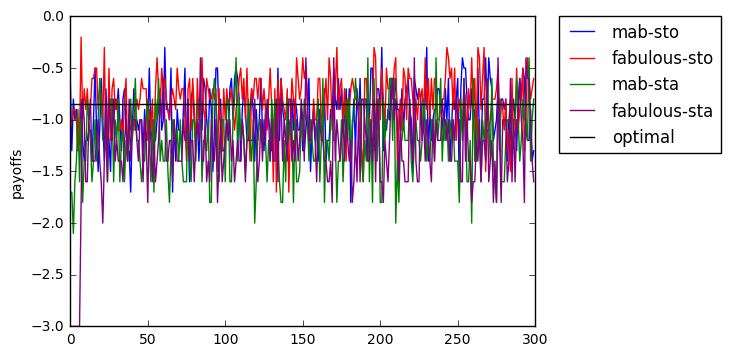

In [93]:
comp = [c1,c2,c3,c4]
colors = ['b', 'r', 'g', 'purple']
labels = ['mab-sto', 'fabulous-sto','mab-sta', 'fabulous-sta']
for i,c in enumerate(comp):
    payoffs = [np.array([f['total'] for f in e.agent.feedbacks]) for e in c.experiments]
    avg_payoffs = sum(payoffs, np.zeros(len(payoffs[0]))) / len(payoffs)
    plt.plot(avg_payoffs, label = labels[i], color=colors[i])
plt.plot([-0.85 for i in range(time_horizon)], label="optimal", color = 'black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('payoffs')
plt.show()

In [139]:
def avg(e):
    return [sum([f['total'] for f in e.agent.feedbacks[:i]])/i for i in list(range(1,len(e.game.history)))[:100]]

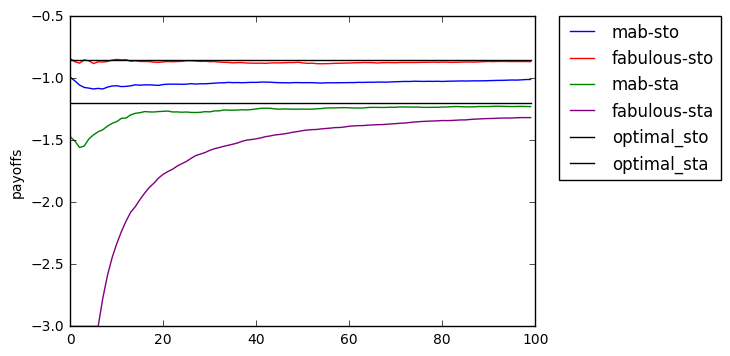

In [141]:
comp = [c1,c2,c3,c4]
colors = ['b', 'r', 'g', 'purple']
labels = ['mab-sto', 'fabulous-sto','mab-sta', 'fabulous-sta']
for i,c in enumerate(comp):
    avgs = [np.array(avg(e)) for e in c.experiments]
    avg_avgs = sum(avgs, np.zeros(len(avgs[0]))) / len(avgs)
    plt.plot(avg_avgs, label = labels[i], color=colors[i])
plt.plot([-0.85 for i in range(100)], label="optimal_sto", color = 'black')
plt.plot([-1.2 for i in range(100)], label="optimal_sta", color = 'black')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('payoffs')
plt.show()

In [39]:
avgs[:10]

[-1.0,
 -1.5,
 -1.0,
 -0.75,
 -0.6,
 -0.5,
 -0.42857142857142855,
 -0.375,
 -0.5555555555555556,
 -0.5]

In [40]:
[f['total'] for f in e.agent.feedbacks][:10]

[-1, -2, 0, 0, 0, 0, 0, 0, -2, 0]